,Preprocessing,Algorithm,Silhouette Score,Davies-Bouldin Score,Adjusted Rand Index
0,StandardScaler,KMeans,0.479881,0.789363,0.432805
1,StandardScaler,Agglomerative,0.446689,0.803467,0.615323
2,StandardScaler,DBSCAN,0.356516,7.124057,0.442099
3,MinMaxScaler,KMeans,0.482929,0.786733,0.700867
4,MinMaxScaler,Agglomerative,0.504800,0.747977,0.719584
5,MinMaxScaler,DBSCAN,NaN,NaN,NaN
6,PCA,KMeans,0.522791,0.739126,0.432805
7,PCA,Agglomerative,0.511060,0.705430,0.586073
8,PCA,DBSCAN,0.524531,5.532100,0.523331


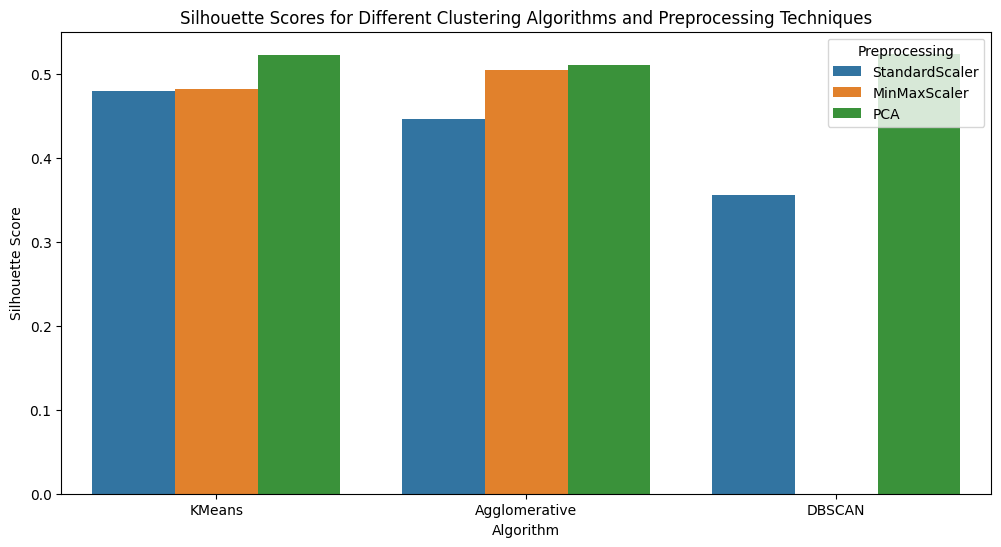

Based on the Silhouette Score and Davies-Bouldin Index, we can see which combination of preprocessing and algorithm yields the best clustering performance. Adjusted Rand Index provides additional insights where ground truth is available.


In [1]:
## Comparative Study of Clustering Algorithms

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

# 2. Load the Iris Dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target

# 3. Preprocessing Techniques
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'PCA': PCA(n_components=2)
}

processed_data = {}

for name, scaler in scalers.items():
    if name == 'PCA':
        processed_data[name] = scaler.fit_transform(StandardScaler().fit_transform(X))
    else:
        processed_data[name] = scaler.fit_transform(X)

# 4. Clustering Algorithms
algorithms = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# 5. Evaluation Metrics
results = []

for prep_name, data in processed_data.items():
    for algo_name, model in algorithms.items():
        if algo_name == 'DBSCAN':
            clusters = model.fit_predict(data)
        else:
            clusters = model.fit_predict(data)

        # Silhouette Score (for clustering validation)
        silhouette = silhouette_score(data, clusters) if len(set(clusters)) > 1 else np.nan

        # Davies-Bouldin Score (lower is better)
        db_score = davies_bouldin_score(data, clusters) if len(set(clusters)) > 1 else np.nan

        # Adjusted Rand Index (if true labels are available)
        ari = adjusted_rand_score(y_true, clusters) if len(set(clusters)) > 1 else np.nan

        # Store the results
        results.append({
            'Preprocessing': prep_name,
            'Algorithm': algo_name,
            'Silhouette Score': silhouette,
            'Davies-Bouldin Score': db_score,
            'Adjusted Rand Index': ari
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# 6. Display Results
display(results_df)

# 7. Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Silhouette Score', hue='Preprocessing', data=results_df)
plt.title('Silhouette Scores for Different Clustering Algorithms and Preprocessing Techniques')
plt.show()

# 8. Conclusion
print("Based on the Silhouette Score and Davies-Bouldin Index, we can see which combination of preprocessing and algorithm yields the best clustering performance. Adjusted Rand Index provides additional insights where ground truth is available.")
